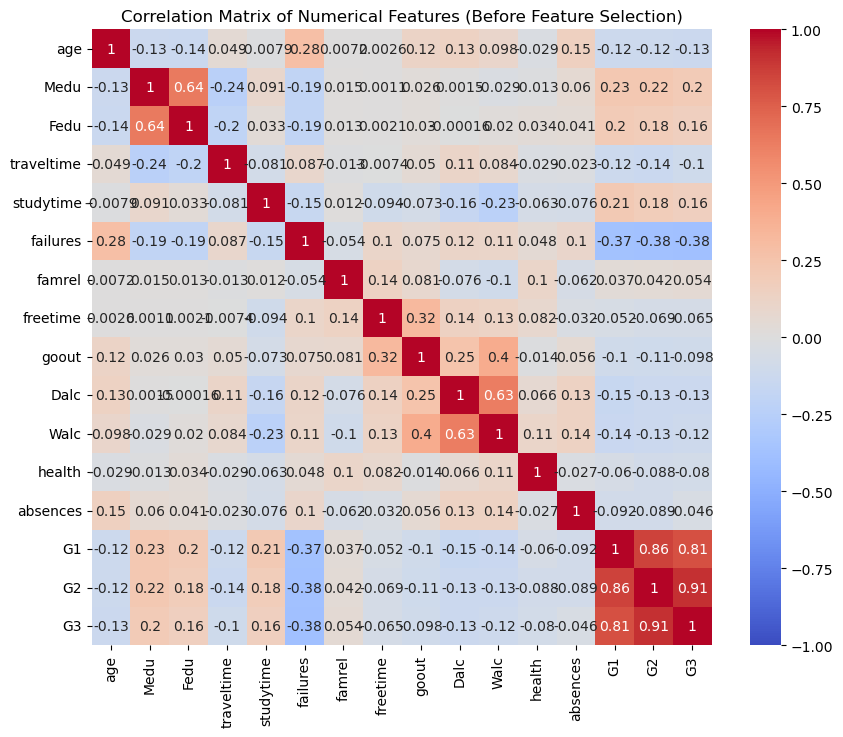


📋 DROPPED FEATURES (Correlation > 0.8): ['G2', 'G3']

📋 DATASET AFTER FEATURE SELECTION (First 5 rows of remaining features):
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  
0     1     1       3         6   5  
1     1     1       3         4   5  
2     2     3       3        10   7  
3     1     1       5         2  15  
4     1     2       5         4   6  


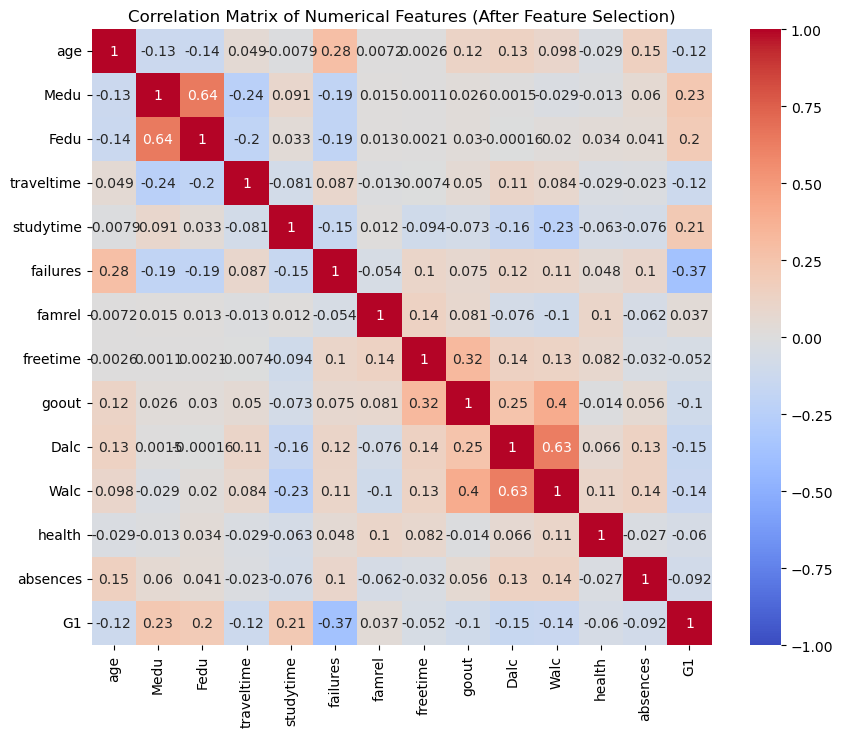

In [1]:
# Member 5:IT24103692 MADUSANKA I.I.T
# Preprocessing Technique: Feature Selection (Using Correlation-Based Method)
# Explanation: Feature selection involves choosing the most relevant features to reduce dimensionality and improve model performance 
# by removing redundant or less informative variables. Here, we use correlation analysis to identify and drop highly correlated features.
# Justification: The dataset (student performance with 34 columns) may contain correlated features (e.g., 'G1', 'G2', 'G3' grades), 
# which can lead to multicollinearity in models like linear regression. Selecting key features improves efficiency and interpretability.

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Load and combine datasets (Update paths to match your environment)
df_math = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-mat.csv', sep=";")
df_por = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-por.csv', sep=";")

df_math['subject'] = 'math'
df_por['subject'] = 'portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)

# Encode categorical variables to proceed with correlation (using LabelEncoder as a simple approach)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Select numerical columns for correlation analysis
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
                     'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# 1. EDA Visualization Before Feature Selection (Correlation Matrix)
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features (Before Feature Selection)')
plt.show()

# Interpretation: The correlation matrix shows high correlations (e.g., 'G1', 'G2', 'G3' are strongly correlated, >0.8), 
# indicating redundancy that can be reduced through feature selection.

# 2. Apply Feature Selection (Remove highly correlated features)
# Set a threshold (e.g., 0.8) to drop one of a pair of highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
df_selected = df[numerical_columns].drop(to_drop, axis=1)

# 3. Show Implementation Output (List of dropped features and first 5 rows of selected features)
print("\n📋 DROPPED FEATURES (Correlation > 0.8):", to_drop)
print("\n📋 DATASET AFTER FEATURE SELECTION (First 5 rows of remaining features):")
print(df_selected.head())

# 4. EDA Visualization After Feature Selection (Updated Correlation Matrix)
plt.figure(figsize=(10, 8))
correlation_matrix_selected = df_selected.corr()
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features (After Feature Selection)')
plt.show()

# Interpretation: The updated matrix shows reduced correlation between remaining features, confirming effective selection 
# and improved model readiness by eliminating redundancy.
# Save the visualization (optional, for results/eda_visualizations/ folder)
plt.savefig('feature_selection_correlation.png')